In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
chicago = pd.read_csv("chicago_2016.csv", parse_dates=["start_time","end_time"])

In [4]:
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber


In [7]:
chicago['driving_time'] = chicago['end_time']-chicago['start_time'] 

In [32]:
def get_weekday (ts):
    return ts.weekday()
def get_hour (ts):
    return ts.hour

chicago["Weekday"]=chicago["start_time"].apply(lambda x: get_weekday (x))
chicago["Hour"]=chicago["start_time"].apply(lambda x: get_hour (x))
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,driving_time,Weekday,Hour
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber,0 days 00:14:00,3,23
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber,0 days 00:11:00,3,23
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber,0 days 00:04:00,3,23
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber,0 days 00:18:00,3,23
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber,0 days 00:04:00,3,23


In [25]:
montag = chicago[chicago["Weekday"]==0].size
dienstag = chicago[chicago["Weekday"]==1].size
mittwoch = chicago[chicago["Weekday"]==2].size
donnerstag = chicago[chicago["Weekday"]==3].size
freitag = chicago[chicago["Weekday"]==4].size
samstag = chicago[chicago["Weekday"]==5].size
sonntag = chicago[chicago["Weekday"]==6].size

print(montag)
print(dienstag)
print(mittwoch)
print(donnerstag)
print(freitag)
print(samstag)
print(sonntag)

weekdaysize = pd.DataFrame({'Weekday': ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], 'Rides': [montag, dienstag, mittwoch, donnerstag, freitag, samstag, sonntag]})

5521810
5417100
4797600
5022980
5292830
5021760
4879750


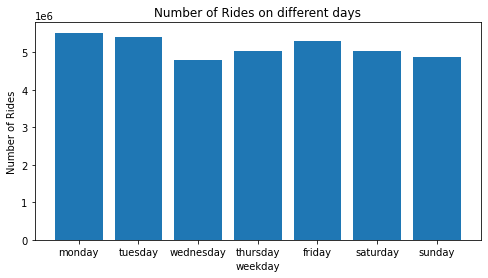

In [26]:
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(weekdaysize["Weekday"], weekdaysize["Rides"])
ax.set_xlabel("weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides on different days")

plt.show()

In [44]:
weekmorning= pd.DataFrame({'Weekday': ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], 'Rides': [chicago[(chicago['Weekday']==0) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==1) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==2) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==3) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==4) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size , chicago[(chicago['Weekday']==5) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size ,chicago[(chicago['Weekday']==6) & (chicago['Hour']<=8) & (chicago['Hour']>=6)].size ] })

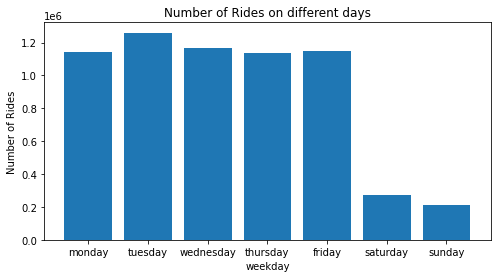

In [45]:
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(weekmorning["Weekday"], weekmorning["Rides"])
ax.set_xlabel("weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides on different days")

plt.show()

In [46]:
## Jahresschwankungen


In [48]:
def get_month (ts):
    return ts.month
chicago["Month"]=chicago["start_time"].apply(lambda x: get_month (x))
chicago.head(2)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,driving_time,Weekday,Hour,Month
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber,0 days 00:14:00,3,23,3
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber,0 days 00:11:00,3,23,3


In [62]:
jan = chicago[chicago["Month"]==1].size
feb = chicago[chicago["Month"]==2].size
mer = chicago[chicago["Month"]==3].size
apr = chicago[chicago["Month"]==4].size
mai = chicago[chicago["Month"]==5].size
juni = chicago[chicago["Month"]==6].size
juli = chicago[chicago["Month"]==7].size
aug = chicago[chicago["Month"]==8].size
sep = chicago[chicago["Month"]==9].size
okt = chicago[chicago["Month"]==10].size
nov = chicago[chicago["Month"]==11].size
dez = chicago[chicago["Month"]==12].size


In [63]:
year= pd.DataFrame({'Months': [ 'january' , 'feburary' , 'march' , 'april' , 'may' ,  'june' , 'july' , 'august' , 'september' , 'october' , 'november', 'december'], 'Rides': [  chicago[chicago['Month']==1].size , chicago[chicago['Month']==2].size , chicago[chicago['Month']==3].size , chicago[chicago['Month']==4].size , chicago[chicago['Month']==5].size , chicago[chicago['Month']==6].size , chicago[chicago['Month']==7].size , chicago[chicago['Month']==8].size , chicago[chicago['Month']==9].size , chicago[chicago['Month']==10].size , chicago[chicago['Month']==11].size , chicago[chicago['Month']==12].size ,]})

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(year["Months"], year["Rides"])
ax.set_xlabel("Months")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides on different days")

plt.show()